In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the datasets 
train = pd.read_csv('credit_train.csv')
test = pd.read_csv('credit_test.csv')

In [3]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Data Cleaning

In [4]:
# checking null values 
train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [5]:
# assigning our target variable numeric values
train['Loan Status'] = np.where(train['Loan Status']=='Fully Paid', 0, 1)

In [10]:
# cleaning columns with nulls 
train['Months since last delinquent'] = np.where((train['Months since last delinquent'].isna() == True),0,train['Months since last delinquent'])
train['Term'] = np.where(train['Term']=='Fully Paid', 0, 1)
train['Annual Income'] = np.where((train['Annual Income'].isna() == True),0,train['Annual Income'])
train['Credit Score'] = np.where((train['Credit Score'].isna() == True),0,train['Credit Score'])

In [7]:
# filling nulls in years in current job column
train['ych_range'] = pd.qcut(train['Years of Credit History'],5, labels=['one','two','three','four','five'])

train['Years in current job'] = np.where(train['Years in current job'].isna()==True, train['ych_range'], train['Years in current job'])

# input_ = {'10+ years':10, '2 years':2, '3 years':3, '< 1 year':0, '5 years':5, '1 year':1, '4 years':4,
#           '6 years':6, '7 years':7, '8 years':8, '9 years':9, 'one':4, 'two':5, 'three':6, 'four':6, 'five':7}

input_ = {'10+ years':'10+ years', '2 years':'2 years', '3 years':'3 years', '< 1 year':'< 1 year', 
          '5 years':'5 years', '1 year':'1 year', '4 years':'4 years', '6 years':'6 years', '7 years':'7 years',
          '8 years':'8 years', '9 years':'9 years',
          'one':'4 years', 'two':'5 years', 'three':'6 years', 'four':'6 years', 'five':'7 years'}

train['Years in current job'] = train['Years in current job'].map(input_)

In [12]:
train.isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                       0
Current Loan Amount             514
Term                              0
Credit Score                      0
Annual Income                     0
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent      0
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             516
Bankruptcies                    718
Tax Liens                       524
ych_range                       514
dtype: int64

In [14]:
# creating a new dataframe with our nulls dropped
df = train.dropna()

In [15]:
df.shape

(99794, 20)

## EDA

#### percentage of defaulters

In [16]:
df['Loan Status'].value_counts()

0    77207
1    22587
Name: Loan Status, dtype: int64

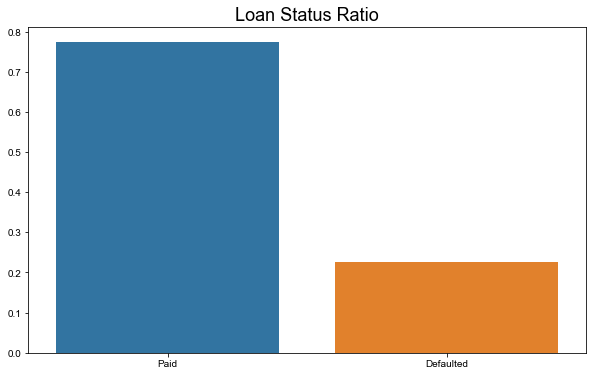

In [22]:
plt.figure(figsize = (10,6))
y = [(77207/len(df)),(22587/len(df))]
x_labels = ['Paid','Defaulted']
sns.barplot(x_labels,y)
sns.set(style='dark')
plt.title('Loan Status Ratio', fontsize=18);